In [1]:
source('source.r')

Packages Loaded:
ncdf4 R.matlab openxlsx RColorBrewer compiler lattice geosphere readxl data.table rworldmap


Loading required package: ncdf4
Loading required package: R.matlab
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘R.matlab’”Loading required package: openxlsx
Loading required package: RColorBrewer
Loading required package: compiler
Loading required package: lattice
Loading required package: geosphere
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘geosphere’”Loading required package: readxl
Loading required package: data.table
Loading required package: rworldmap
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘rworldmap’”

# Vertical Analysis Module

In [2]:
load(file='./RStates/ship.final.rdata')
unique(ship.data$Cycle)

[1] "Cycle0"             "SeaSoar1"           "Transect1"         
 [4] "MVP Transect 1"     "Cycle1"             "Cycle1-vertical"   
 [7] "MVP Transect 3"     "Cycle2"             "Cycle2 Vertical"   
[10] "MVP Transect 4"     "Transect2"          "MVP Transect 5"    
[13] "Cycle3"             "Bowtie 1"           "Transect3"         
[16] "Bowtie 2"           "Cycle4"             "Cycle4-Vertical"   
[19] "SeaSoar2"           "BBL"                "Santa Cruz Basin 1"
[22] "TransComp"          "Santa Cruz Basin 2"

In [ ]:
winch = read.xlsx('Raw Data/Profiles/winch-depth profiles.xlsx', sheet='All')
winch$DateTime = conv_excel_time(winch$DateTime, tz = 'UTC')
str(winch)

In [10]:
ship.data$Vertical = 0
ship.data$Vertical.Depth = 0

for (j in unique(winch$Cycle)) {
    for (i in 1:nrow(ship.data)) {
        dt = as.numeric(difftime(ship.data$DT[i], winch$DateTime[which$Cycle == j], units = 'minutes'))
        if (any(dt < 0) & any(dt > 0)) {
            ship.data$Vertical[i] = 1
            l1 = which.min(-dt[dt<0])
            l2 = which.min(dt[dt > 0])
            
            m = (winch$Depth[dt > 0][l2] - winch$Depth[dt < 0][l1]) / (dt[dt < 0][l1] + dt[dt > 0][l2])
            ship.data$Vertical.Depth[i] = m * 
        }
    }
}

ERROR: Error in parse(text = x, srcfile = src): <text>:14:9: unexpected '}'
13:             ship.data$Vertical.Depth[i] = m * 
14:         }
            ^


In [18]:
plot.profile = function(name) {
    l = which(winch$ == name)
    
    plot(ship.data$DT[l], ship.data$Optode.ch2[l], pch=20, col='red', main=name, ylab='NCP', xlab='')
    points(ship.data$DT[l], ship.data$MIMS.O2.Ar[l], pch=20, col='blue')
}

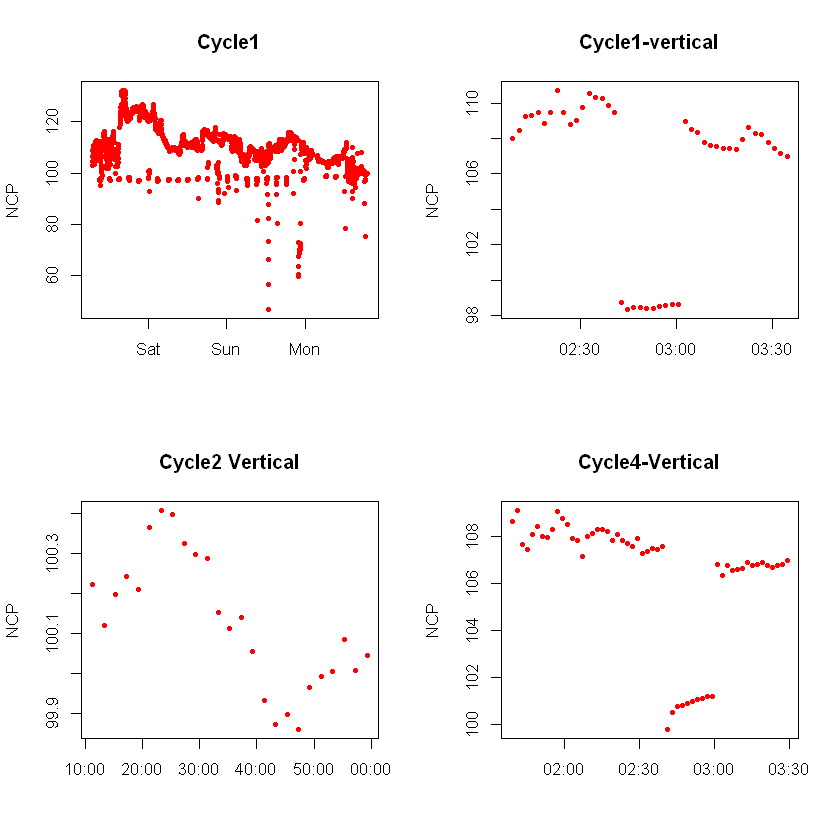

In [19]:
par(mfrow=c(2,2))
plot.profile('Cycle1')
plot.profile(vp.names[1])
plot.profile(vp.names[2])
plot.profile(vp.names[3])